## Regresión Lineal Simple.

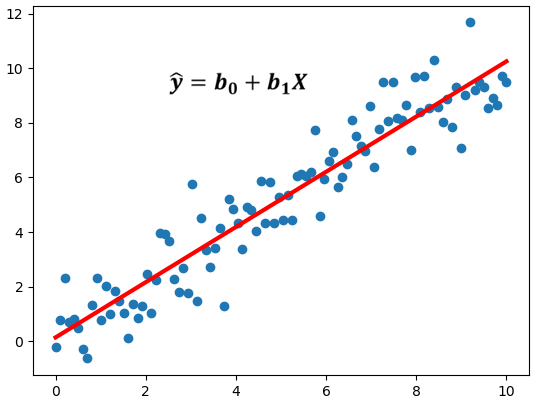

Es un modelo estadístico con el objetivo de buscar la mejor línea recta que se adapte al conjunto de los datos.



Los puntos que están alejados de la línea recta se les considera como el error cuadrático medio. Y usando la técnica de mínimos cuadrados ordinarios para encontrar aquella recta donde presenta menor tasa de error.


* $b0$ representa la intercepción que es una constante. Es decir un valor que no cambia.
* $b1$ representa el coeficiente de la variable.
* $X$ representa la variable predictora. Que se va a multiplicar por el valor del coeficiente.

### Problema a resolver.

Imaginemos que somos científicos de datos. Nos acabamos de mudar a Boston y necesitamos buscar un departamento para poder vivir. 

El precio será en función al número de habitaciones del departamento.

Pra ello usaremos un dataset muy famaso de Boston. Que lo tiene por defecto la libreria de sklearn que es una libreria especializada en el aprendizaje automático.

### Cargar librerias.

In [16]:
import matplotlib.pyplot as plt # Gráficar
import seaborn as sns # Gráficar
from sklearn.datasets import load_boston  # Importamos el dataset                     
import warnings
import torch # Imporrtamos la libreria de PyTorch

In [7]:
warnings.filterwarnings("ignore")
# Ignorar mensajes de advertencia.

In [38]:
boston=load_boston()

In [13]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

El dataset cuenta con 13 atributos.


Pero sólo seleccionaremos la variabel RM que hace referencia al número de habitación del departamento y tiene el indice 5 ya que en Python se inicia con 0.

In [52]:
X,y=boston.data[:,5].reshape(-1,1),boston.target.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
rescale=MinMaxScaler() # Hacemos un reajuste de escalas para que quede de 0 a 1 con el objetivo que el modelo
# pueda converger más rápido.

X=rescale.fit_transform(X) 
y=rescale.fit_transform(y)

In [53]:
X,y=torch.Tensor(X),torch.Tensor(y)
 # Transformamos las variables a Tensor

In [40]:
X.shape

torch.Size([506, 1])

In [22]:
sns.set_style(style="darkgrid") # Agregamos estilo.

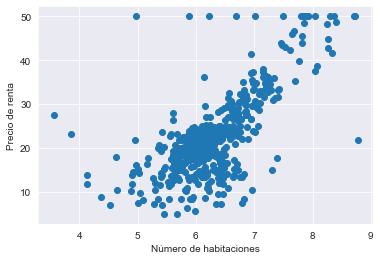

In [23]:
plt.scatter(X,y)
plt.xlabel("Número de habitaciones")
plt.ylabel("Precio de renta")
plt.show()

Observamos que si hay una tendencia mayoritaria a aumenter los precios del departamento.

## Creación del modelo.

In [54]:
class Model(torch.nn.Module): # Pasamos por herencia el modulo de las capas de las redes neuronales.
    
    def __init__(self):
        super(Model,self).__init__()
        self.linear=torch.nn.Linear(in_features=1,out_features=1)
        # Usamos una función de activación del tipo lineal.
        # in_features representa la cantidad de variables predictoras.
        # out_features número de salidas de el modelo.
        
    def forward(self,x):
        
        return self.linear(x) # Pasamos los datos de entrada a la función de activación.

In [64]:
model=Model()
optimizer=torch.optim.Adam(model.parameters(),lr=0.004) # Usamos el optimizador Adam con taza de aprendizaje de 0.004 
criterion=torch.nn.MSELoss() # Usamos la  función de perdida MSE que es la que se usa para modelos de regresión.

In [28]:
model

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [73]:
for epoch in range(1000): # Definemos el número de epocas
    
    y_pred=model(X)
    loss=criterion(y_pred,y)
    
    optimizer.zero_grad() # Inicializamos a 0 el gradinetes
    loss.backward() # Calcula la función de perdida
    optimizer.step() # Actualiza el gradiente
    
    print(f"epoch {epoch} loss {loss.item()}")

epoch 0 loss 0.06371533870697021
epoch 1 loss 0.06245450675487518
epoch 2 loss 0.06122592091560364
epoch 3 loss 0.06002892181277275
epoch 4 loss 0.05886287987232208
epoch 5 loss 0.0577271543443203
epoch 6 loss 0.056621138006448746
epoch 7 loss 0.055544205009937286
epoch 8 loss 0.05449574813246727
epoch 9 loss 0.053475186228752136
epoch 10 loss 0.052481912076473236
epoch 11 loss 0.051515351980924606
epoch 12 loss 0.050574932247400284
epoch 13 loss 0.04966007545590401
epoch 14 loss 0.0487702377140522
epoch 15 loss 0.04790486767888069
epoch 16 loss 0.047063421458005905
epoch 17 loss 0.04624534398317337
epoch 18 loss 0.04545013979077339
epoch 19 loss 0.04467727616429329
epoch 20 loss 0.04392623156309128
epoch 21 loss 0.043196532875299454
epoch 22 loss 0.04248765483498573
epoch 23 loss 0.04179913178086281
epoch 24 loss 0.04113047197461128
epoch 25 loss 0.040481217205524445
epoch 26 loss 0.03985089808702469
epoch 27 loss 0.03923904895782471
epoch 28 loss 0.038645241409540176
epoch 29 loss 0.

epoch 407 loss 0.0216088704764843
epoch 408 loss 0.021608801558613777
epoch 409 loss 0.021608728915452957
epoch 410 loss 0.021608661860227585
epoch 411 loss 0.021608592942357063
epoch 412 loss 0.021608518436551094
epoch 413 loss 0.02160845324397087
epoch 414 loss 0.02160838060081005
epoch 415 loss 0.02160831168293953
epoch 416 loss 0.021608242765069008
epoch 417 loss 0.021608170121908188
epoch 418 loss 0.021608099341392517
epoch 419 loss 0.021608030423521996
epoch 420 loss 0.021607961505651474
epoch 421 loss 0.021607888862490654
epoch 422 loss 0.021607819944620132
epoch 423 loss 0.02160774916410446
epoch 424 loss 0.02160767652094364
epoch 425 loss 0.02160760946571827
epoch 426 loss 0.02160753682255745
epoch 427 loss 0.02160746604204178
epoch 428 loss 0.021607397124171257
epoch 429 loss 0.021607326343655586
epoch 430 loss 0.021607255563139915
epoch 431 loss 0.021607184782624245
epoch 432 loss 0.021607112139463425
epoch 433 loss 0.021607045084238052
epoch 434 loss 0.021606972441077232
ep

epoch 819 loss 0.021579965949058533
epoch 820 loss 0.02157990075647831
epoch 821 loss 0.021579835563898087
epoch 822 loss 0.021579768508672714
epoch 823 loss 0.021579701453447342
epoch 824 loss 0.02157963253557682
epoch 825 loss 0.021579567342996597
epoch 826 loss 0.021579502150416374
epoch 827 loss 0.02157943695783615
epoch 828 loss 0.021579373627901077
epoch 829 loss 0.021579304710030556
epoch 830 loss 0.021579239517450333
epoch 831 loss 0.02157917246222496
epoch 832 loss 0.021579105406999588
epoch 833 loss 0.021579042077064514
epoch 834 loss 0.021578973159193993
epoch 835 loss 0.021578911691904068
epoch 836 loss 0.021578842774033546
epoch 837 loss 0.021578779444098473
epoch 838 loss 0.0215787161141634
epoch 839 loss 0.021578649058938026
epoch 840 loss 0.021578583866357803
epoch 841 loss 0.02157851681113243
epoch 842 loss 0.021578453481197357
epoch 843 loss 0.021578384563326836
epoch 844 loss 0.021578319370746613
epoch 845 loss 0.02157825417816639
epoch 846 loss 0.021578188985586166


In [74]:
y_true=y.detach().numpy()
y_pred=model(X).detach().numpy() # Transformamos los tensores a arreglos

In [75]:
x=X.detach().numpy()

In [83]:
from sklearn.metrics import r2_score

In [86]:
r2_score(y_true,y_pred)

0.482626349556593

El $R2$ mide el grada de varaianza que existe entre el valor original y el predicho.

Se mide de 0 a 1. Entre más cercano sea a 1 mayor va hacer el ajsute del modelo.

### Visualización gráfica.

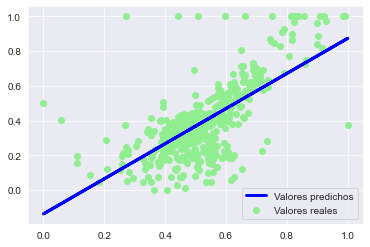

In [82]:
plt.scatter(x,y_true,c="lightgreen",label="Valores reales")
plt.plot(x,y_pred,c="blue",lw=3,label="Valores predichos")
plt.legend()
plt.show()

El modelo no alcanza a cubrir la mayoria de los datos. Debido a que faltan más varaibles a tener en cuenta para tener una mejor desempeño.

Generalmente entre más variables predictoras  tenga el modelo tendrá un mejor rendimiento.
Ya que la mayoría de los problemas dependen de múltiples variables.